In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('seaborn-colorblind')
sns.set_theme()
%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'figure.titlesize': 'x-large',
          'figure.dpi': 150,
         'axes.labelsize': 'x-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'savefig.bbox': 'tight'}

plt.rcParams.update(params)
# plt.rcParams.keys() ### Use to check the available parameters

In [2]:
errors = pd.read_excel('Model Evaluation.xlsx', sheet_name='Error quantification')

In [3]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Period                     20 non-null     object 
 1   Historical Average 1       20 non-null     float64
 2   Historical Average 2       20 non-null     float64
 3   Historical Average 3       20 non-null     float64
 4   ARIMA (1,1,0-0,1,0,24)     20 non-null     float64
 5   ARIMA (0,1,1-0,1,0,24)     20 non-null     float64
 6   ARIMA (0,1,1-1,1,0,24)     20 non-null     float64
 7   AR LSTM                    20 non-null     float64
 8   Improved LSTM              20 non-null     float64
 9   LSTM Input regularization  20 non-null     float64
 10  Probabilistic LSTM         20 non-null     float64
 11  Probabilistic LSTM 2       20 non-null     float64
 12  Probabilistic LSTM 3       20 non-null     float64
dtypes: float64(12), object(1)
memory usage: 2.2+ KB


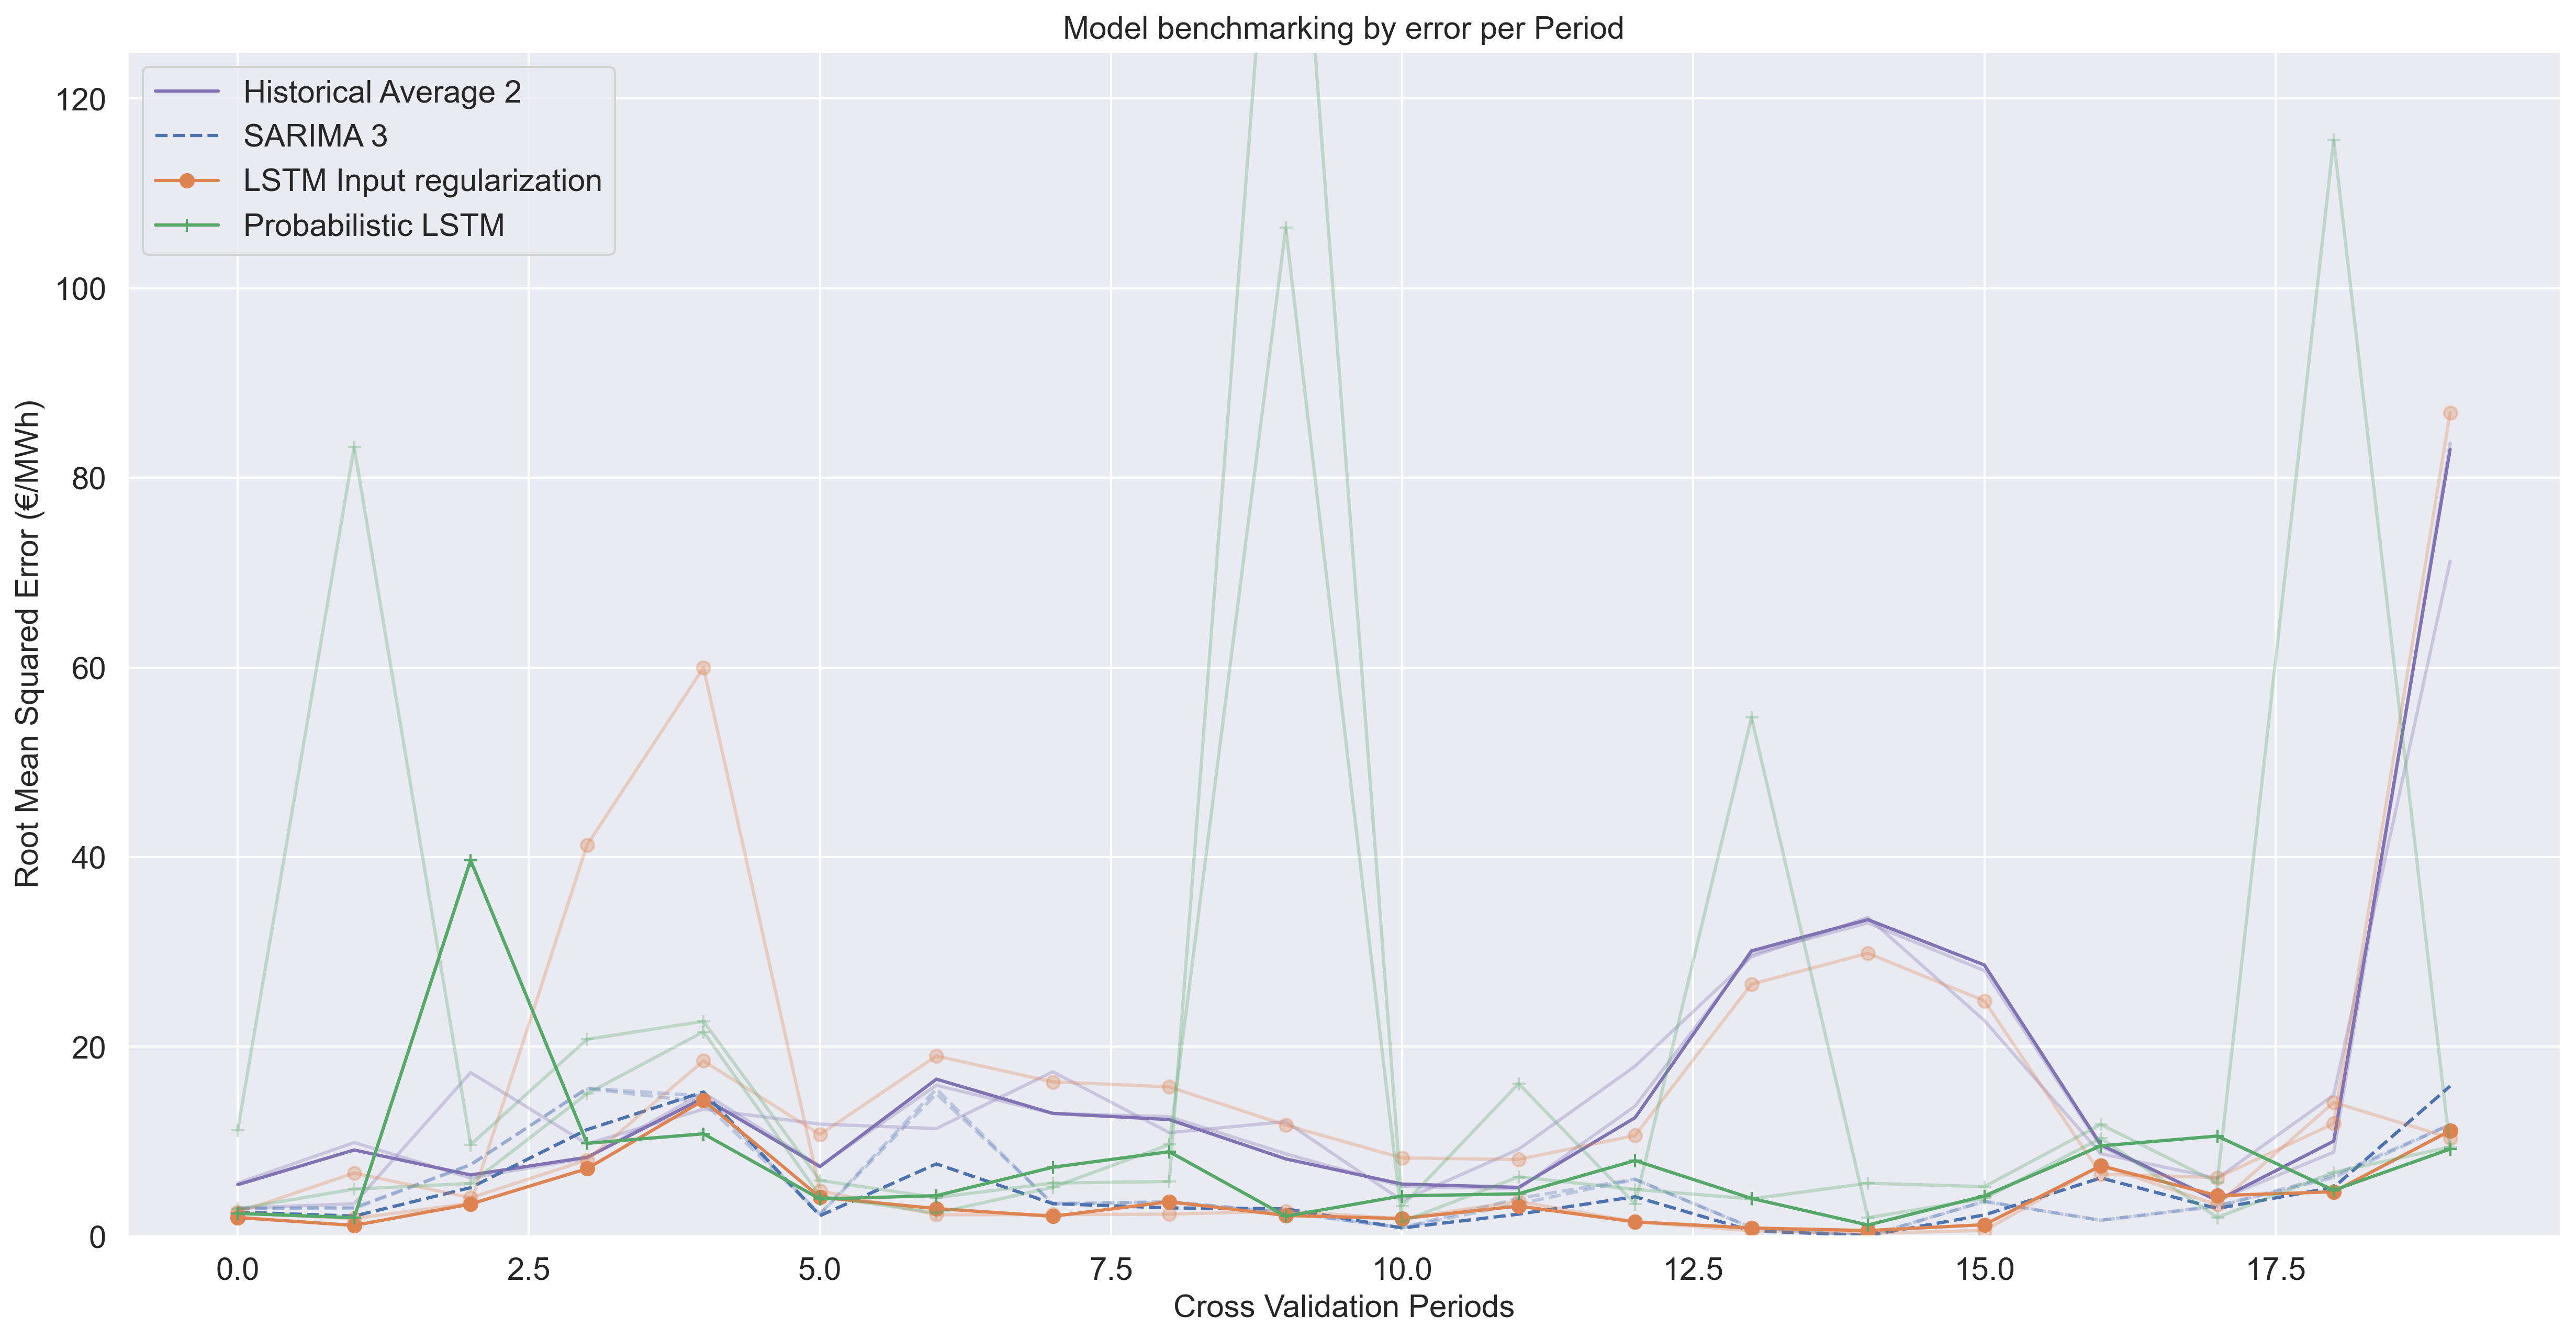

In [11]:
plt.rcParams.update(params)
plt.title('Model benchmarking by error per Period')
### Historical averages
plt.ylim([0,125])
plt.plot(errors.index, errors['Historical Average 1'], 'C4', alpha=.3)#, label= 'Historical Average 1')
plt.plot(errors.index, errors['Historical Average 2'], 'C4', label= 'Historical Average 2')
plt.plot(errors.index, errors['Historical Average 3'], 'C4', alpha=.3)#, label= 'Historical Average 3')
### Classical statistical models
plt.plot(errors.index, errors['ARIMA (1,1,0-0,1,0,24)'], 'C0--', alpha=.3)#, label= 'SARIMA 1')
plt.plot(errors.index, errors['ARIMA (0,1,1-0,1,0,24)'], 'C0--', alpha=.3)# label= 'SARIMA 2')
plt.plot(errors.index, errors['ARIMA (0,1,1-1,1,0,24)'], 'C0--', label= 'SARIMA 3')
### Recurrent Neural networks
plt.plot(errors.index, errors['AR LSTM'], 'C1o-', alpha=.3)#, label= 'AR LSTM')
plt.plot(errors.index, errors['Improved LSTM'], 'C1o-', alpha=.3)# label= 'Improved LSTM')
plt.plot(errors.index, errors['LSTM Input regularization'], 'C1o-', label= 'LSTM Input regularization')
### Probabilistic recurrent neural networks
plt.plot(errors.index, errors['Probabilistic LSTM'], 'C2+-', label= 'Probabilistic LSTM')
plt.plot(errors.index, errors['Probabilistic LSTM 2'], 'C2+-', alpha=.3) #label= 'Probabilistic LSTM 2')
plt.plot(errors.index, errors['Probabilistic LSTM 3'], 'C2+-', alpha=.3)# label= 'Probabilistic LSTM 3')
plt.xlabel('Cross Validation Periods')
plt.ylabel('Root Mean Squared Error (€/MWh)')
plt.legend(loc='best')
plt.savefig('Plots/Model benchmarking of error by Period.png')
plt.show()
